# Classification model using KNNN

### 1. Import libraries

In [17]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload RNA data

In [18]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_2776_genes_839_nodes.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,ABCB1,ABCB6,ABCG2,ABL2,ACADM,ACD,ACE,ACE2,ACHE,...,XRCC6,YAP1,YBX1,YBX3,YY1,ZBTB17,ZHX2,ZMIZ1,ZMPSTE24,Y
0,0,36.716012,33.867624,29.676682,32.862716,35.061520,31.801427,31.988036,30.172489,29.912204,...,35.24634,33.97677,37.51551,35.75761,33.53412,31.72285,33.23150,32.38760,32.22373,1
1,1,34.174577,32.703008,31.318871,33.061603,35.908450,31.878071,33.015718,33.634947,26.076400,...,35.91455,34.75610,36.67356,35.85355,34.44291,31.63512,32.63491,33.78434,32.19111,1
2,2,31.225510,34.522351,30.612181,32.658413,34.370223,31.425178,31.714695,26.858096,27.589284,...,36.05801,34.48484,36.41164,35.24518,35.14050,31.99899,34.31359,32.95630,32.77568,1
3,3,32.988641,33.059035,31.973489,33.014431,35.824161,31.829645,32.916062,29.565514,28.143610,...,35.75676,35.27953,36.58061,36.19379,34.96911,31.28469,33.03073,33.88207,32.46805,0
4,4,33.284849,31.488348,30.774368,33.793065,34.332987,32.020127,31.824945,28.767942,26.537023,...,36.33015,34.50745,36.89459,34.95292,34.76483,33.40109,32.15993,33.35772,31.64157,1


In [19]:
X = data.iloc[:,1:839  ] 
Y = []
for i in range (len(data)):
    if data.Y[i]==0: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
print(X)
print('Numero de pacientes: ',len(Y))

         ABCB1      ABCB6      ABCG2       ABL2      ACADM        ACD  \
0    36.716012  33.867624  29.676682  32.862716  35.061520  31.801427   
1    34.174577  32.703008  31.318871  33.061603  35.908450  31.878071   
2    31.225510  34.522351  30.612181  32.658413  34.370223  31.425178   
3    32.988641  33.059035  31.973489  33.014431  35.824161  31.829645   
4    33.284849  31.488348  30.774368  33.793065  34.332987  32.020127   
..         ...        ...        ...        ...        ...        ...   
176  33.838323  32.296025  30.740420  33.040376  34.981970  31.823358   
177  31.895951  33.784466  29.347511  31.571621  34.865097  29.786302   
178  33.842290  32.838072  29.862937  33.491465  34.379400  31.246333   
179  34.715293  32.561403  29.292590  33.151894  34.802123  32.344355   
180  32.476530  32.316413  26.957145  33.580139  34.950670  32.959610   

           ACE       ACE2       ACHE       ACO2  ...     XRCC4     XRCC6  \
0    31.988036  30.172489  29.912204  35.812113

### 3. Train-Test dataset split

In [20]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [21]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 7 and is: 0.5946


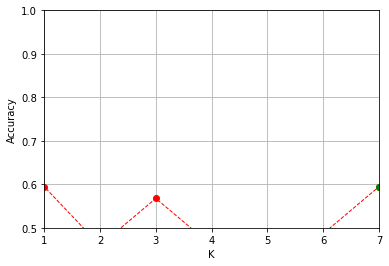

In [22]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [23]:
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x00000198CD37F3A0>,
                     n_neighbors=7)

### 6. Predictions

In [24]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,0,1,1
1,1,1,1
2,0,1,0
3,1,1,1
4,0,1,1


In [25]:
# Cross validation
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters:" +str(np.mean(result1)))
print("Best result of the cross validation of the model (manhattan) with the best paramters:" +str(np.mean(result2)))


Best result of the cross validation of the model (euclidean) with the best paramters:0.5206896551724138
Best result of the cross validation of the model (manhattan) with the best paramters:0.4517241379310345


#### 6.1. Manhattan model

In [26]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [27]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [28]:
print('Final accuracy on the training dataset (manhattan): ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset (manhattan): ' + str(contTest/len(yTest)))

Final accuracy on the training dataset (manhattan): 0.6388888888888888
Final accuracy on the testing dataset (manhattan): 0.5135135135135135


In [29]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[37 31]
 [21 55]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1
 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0]


In [30]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.64      0.54      0.59        68
           1       0.64      0.72      0.68        76

    accuracy                           0.64       144
   macro avg       0.64      0.63      0.63       144
weighted avg       0.64      0.64      0.64       144



In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[ 6 11]
 [ 7 13]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1]


In [32]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.46      0.35      0.40        17
           1       0.54      0.65      0.59        20

    accuracy                           0.51        37
   macro avg       0.50      0.50      0.50        37
weighted avg       0.50      0.51      0.50        37

